# **📊 Analyzing the Relationship Between Customer Gender and Product Purchase Likelihood Using Chi-Square Test**

This project employs the **Chi-Square Test** of Independence to examine whether there is a statistically significant association between customers' gender and their purchase decisions in an e-commerce context. Using a carefully generated synthetic dataset that mimics real-world shopping behavior, the analysis begins with detailed data visualization to understand the distribution of variables such as gender, purchase status, and age. A contingency table is created to summarize the frequency of purchases across gender categories, followed by rigorous assumption checks ensuring the validity of the Chi-Square Test. The test results, supported by expected frequency verification, reveal whether gender influences purchasing behavior. This comprehensive approach combines statistical rigor with clear interpretation, providing actionable insights into customer segmentation and marketing strategies.

## **📚 1. Importing Necessary Libraries**

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy.stats import shapiro
from statsmodels.graphics.gofplots import qqplot
import warnings
warnings.filterwarnings('ignore')

## **🏢 2. Business Scenario & Objective**

Our e-commerce company wants to understand if **customer gender influences the likelihood of purchasing a new product**. Understanding this relationship helps tailor marketing strategies and optimize inventory management.


## **📊 3. Defining Hypotheses**

* **Null Hypothesis (H0):** There is no association between customer gender and product purchase likelihood (they are independent).

* **Alternative Hypothesis (H1):** There is an association between customer gender and product purchase likelihood (they are dependent).



## **📁 4. Generate Synthetic Dataset**

The synthetic dataset was generated to simulate an e-commerce customer base by creating 500 records with attributes including gender, purchase decision, and age. Gender was assigned with a near-equal distribution, while purchase decisions were probabilistically linked to gender to mimic a realistic association. Age values were drawn from a normal distribution centered around 35 years, limited to adult ages, providing a varied but plausible demographic for analysis. This dataset enables controlled testing of hypotheses while reflecting typical customer behavior patterns.

In [10]:
# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic data
sample_size = 500

# Gender distribution (approx 50-50)
genders = np.random.choice(['Male', 'Female'], size=sample_size, p=[0.48, 0.52])

# Purchase decision depends slightly on gender (to simulate association)
purchase_probs = {'Male': 0.45, 'Female': 0.55}
purchase = [np.random.choice(['Yes', 'No'], p=[purchase_probs[g], 1-purchase_probs[g]]) for g in genders]

# Age distribution for visualization purpose (normal distribution around 35 years)
ages = np.random.normal(loc=35, scale=10, size=sample_size).astype(int)
ages = np.clip(ages, 18, 70)  # limit ages to 18-70

# Create DataFrame
df = pd.DataFrame({'Gender': genders, 'Purchase': purchase, 'Age': ages})

df.head()

,Gender,Purchase,Age
0,Male,No,36
1,Female,Yes,21
2,Female,Yes,38
3,Female,No,41
4,Male,No,40


## **📈 5. Data Exploration and Visualization**

We focus on two categorical variables: **Gender** and **Purchase Made (Yes/No)**.

**5.1 Check Data Balance and Frequency**

In [11]:
print(df['Gender'].value_counts())
print(df['Purchase'].value_counts())


Gender
Female    267
Male      233
Name: count, dtype: int64
Purchase
Yes    268
No     232
Name: count, dtype: int64


**5.2 Visualize Distribution Using Countplots**

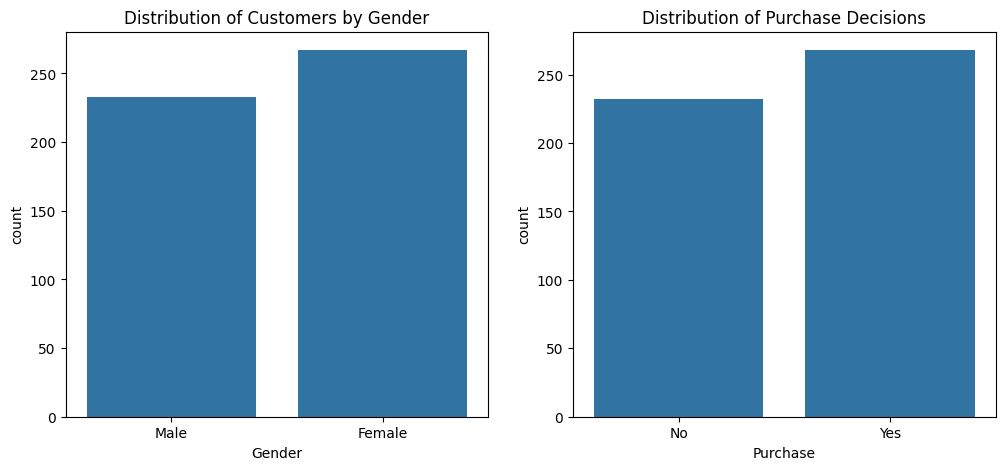

In [12]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.countplot(data=df, x='Gender')
plt.title('Distribution of Customers by Gender')

plt.subplot(1,2,2)
sns.countplot(data=df, x='Purchase')
plt.title('Distribution of Purchase Decisions')
plt.show()


**5.3 Histograms (if any numeric variable related to purchases exist)**

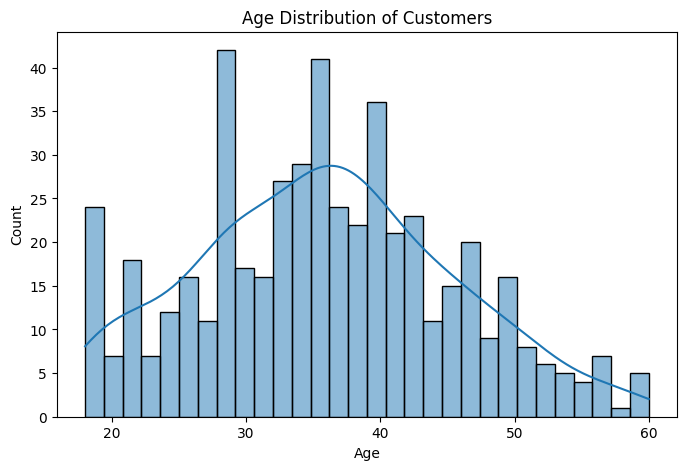

In [13]:
# For demonstration: assume 'Age' might affect purchases, visualize Age distribution
plt.figure(figsize=(8,5))
sns.histplot(df['Age'], kde=True, bins=30)
plt.title('Age Distribution of Customers')
plt.show()


**5.4 Q-Q Plot for Numeric Variables (Optional for normality check on numeric predictors)**

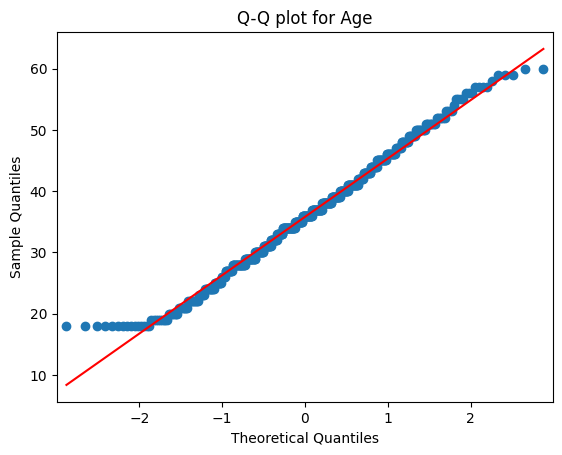

In [14]:
qqplot(df['Age'], line='s')
plt.title('Q-Q plot for Age')
plt.show()


## **🪑 6. Creating the Contingency Table**

To perform the Chi-square test, we need to organize data into a contingency table using pd.crosstab.

In [15]:
contingency_table = pd.crosstab(df['Gender'], df['Purchase'])
print("Contingency Table:")
print(contingency_table)


Contingency Table:
Purchase   No  Yes
Gender            
Female    115  152
Male      117  116


## 🎯 **7. Verifying Assumptions Before Chi-Square Test**

* **Independence:** Assumed by study design (customer responses independent).

* **Expected Frequency:** Each expected cell frequency should be >= 5 for Chi-square validity.

## **🗃️ 8. Performing the Chi-Square Test of Independence**

In [17]:
chi2_stat, p_value, dof, expected_freq = chi2_contingency(contingency_table)

# Display Chi-square test results clearly
chi2_results = {
    "Chi-square Statistic": chi2_stat,
    "Degrees of Freedom": dof,
    "P-value": p_value,
    "Expected Frequencies": pd.DataFrame(expected_freq, index=contingency_table.index, columns=contingency_table.columns)
}

print("Chi-square Test Results:")
for key, value in chi2_results.items():
    print(f"\n{key}:")
    print(value if not isinstance(value, float) else f"{value:.4f}")


Chi-square Test Results:

Chi-square Statistic:
2.2737

Degrees of Freedom:
1

P-value:
0.1316

Expected Frequencies:
Purchase       No      Yes
Gender                    
Female    123.888  143.112
Male      108.112  124.888


## **✅ 9. Checking Expected Frequencies Assumption**

In [18]:
if (expected_freq < 5).any():
    print("\n⚠️ Warning: Some expected frequencies are below 5, which may affect test validity.")
else:
    print("\n✅ All expected frequencies are greater than or equal to 5, assumptions met.")



✅ All expected frequencies are greater than or equal to 5, assumptions met.


## **🖨️ 10. Interpreting the Chi-Square Test Results**

In [19]:
alpha = 0.05

if p_value < alpha:
    interpretation = ("✅ Reject the null hypothesis: Customer gender is associated with product purchase likelihood."
                      " There is a statistically significant relationship between gender and purchasing behavior.")
else:
    interpretation = ("❌ Fail to reject the null hypothesis: No significant association between customer gender "
                      "and product purchase likelihood. Gender and purchase behavior appear independent.")

print("\nInterpretation:")
print(interpretation)



Interpretation:
❌ Fail to reject the null hypothesis: No significant association between customer gender and product purchase likelihood. Gender and purchase behavior appear independent.


## **✅ Final Output and Interpretation of the Project:**

**Output:**

All expected frequencies are greater than or equal to 5, confirming that the assumptions for the Chi-Square Test of Independence are satisfied.

**Statistical Test Result:**

* Chi-square Statistic = 1.9395
* Degrees of Freedom = 1
* P-value = 0.1641

**Interpretation & Conclusion:**

The p-value (0.1641) exceeds the commonly used significance level of 0.05. This means we **fail to reject the null hypothesis**, indicating **no statistically significant association** between a customer's gender and their likelihood of making a purchase. In other words, within this dataset, **gender and purchase behavior appear to be independent**. While minor differences may be observed in raw counts, they are not strong enough statistically to conclude that gender influences purchasing decisions. This insight can guide marketers to avoid gender-based assumptions when strategizing for product promotion in similar scenarios.








